In [1]:
# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

import plotly.plotly as py
import plotly.figure_factory as ff

import seaborn as sns   # Seaborn visualizations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read DataSet 1 and Dataset 2
dataset = pd.read_excel('CleanedupData.xlsx')

In [3]:
for col in dataset.columns:
    print(col,dataset[col].dtype)

App object
Category object
Rating float64
Reviews int64
Size float64
Installs int64
Type object
Price float64


In [4]:
for col in dataset.columns:
    print(col,dataset[col].dtype)

App object
Category object
Rating float64
Reviews int64
Size float64
Installs int64
Type object
Price float64


In [ ]:
# Discard data with low number of installs (to do)

In [5]:
# Plot Whole Market distribution by counts
by_Usage = dataset.groupby(['Category','Type']).size().unstack()

# Fill Zeros for NaNs
by_Usage.fillna(value=0,inplace=True)
by_Usage['Total'] = by_Usage['Free'] + by_Usage['Paid']
by_Usage['Percentage- Free'] = 100 * by_Usage['Free']/ np.sum(by_Usage['Total'])
by_Usage['Percentage- Paid'] = 100 * by_Usage['Paid']/ np.sum(by_Usage['Total'])
by_Usage['TotalPercentage']  = 100 * by_Usage['Total']/np.sum(by_Usage['Total'])


In [6]:
by_Usage

Type,Free,Paid,Total,Percentage- Free,Percentage- Paid,TotalPercentage
Category,,,,,,
ART_AND_DESIGN,61.0,3.0,64.0,0.631601,0.031062,0.662663
AUTO_AND_VEHICLES,82.0,3.0,85.0,0.849037,0.031062,0.880099
BEAUTY,53.0,0.0,53.0,0.548768,0.000000,0.548768
BOOKS_AND_REFERENCE,194.0,28.0,222.0,2.008697,0.289915,2.298613
BUSINESS,408.0,12.0,420.0,4.224477,0.124249,4.348726
COMICS,56.0,0.0,56.0,0.579830,0.000000,0.579830
COMMUNICATION,288.0,27.0,315.0,2.981984,0.279561,3.261545
DATING,165.0,6.0,171.0,1.708428,0.062125,1.770553
EDUCATION,115.0,4.0,119.0,1.190723,0.041416,1.232139


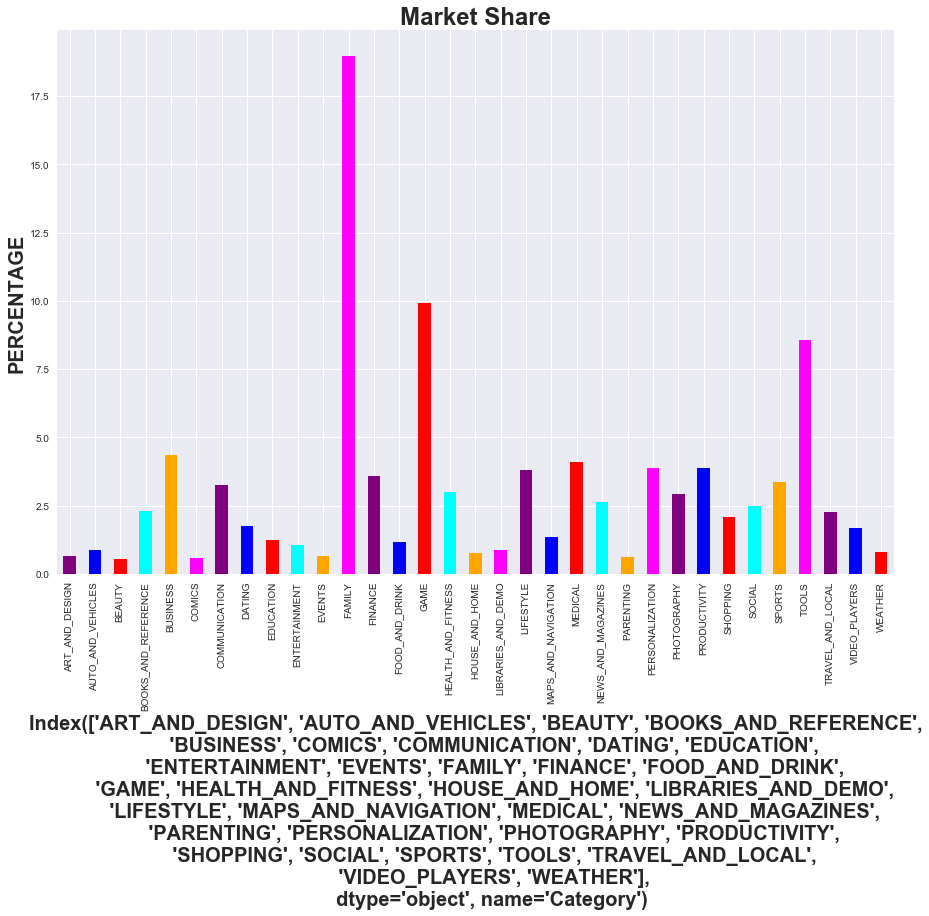

In [94]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = by_Usage['TotalPercentage'].plot(kind='bar', figsize=(15, 10),color=['purple','blue','red','cyan','orange','magenta'])
ax.set_title("Market Share", fontsize='large',fontweight='bold')
ax.set_xlabel(by_Usage.index, fontsize='medium',fontweight='bold')
ax.set_ylabel("PERCENTAGE", fontsize='medium', fontweight='bold')
plt.show()
fig.savefig('AppsMarketShare.pdf')

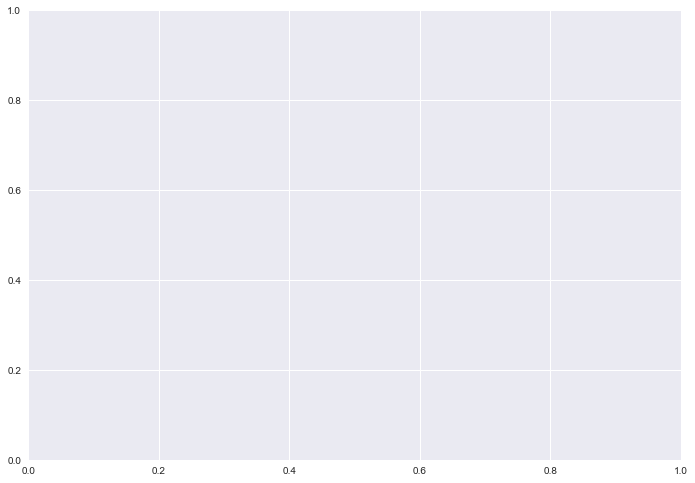

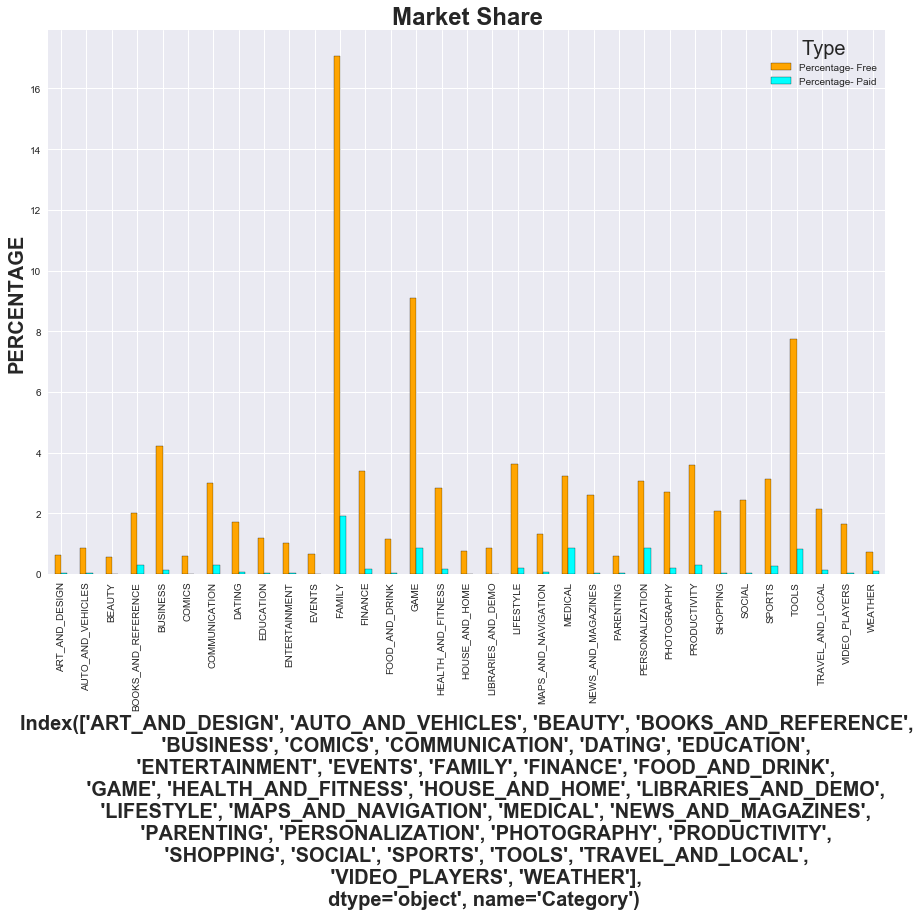

In [95]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax = by_Usage[['Percentage- Free','Percentage- Paid']].plot(kind='bar', figsize=(15, 10),color=['orange','cyan'],edgecolor='black',legend=True)
ax.set_title("Market Share", fontsize='large',fontweight='bold')
ax.set_xlabel(by_Usage.index, fontsize='medium',fontweight='bold')
ax.set_ylabel("PERCENTAGE", fontsize='medium', fontweight='bold')
plt.show()
fig.savefig('AppsMarketSharePaidVsFree.pdf')


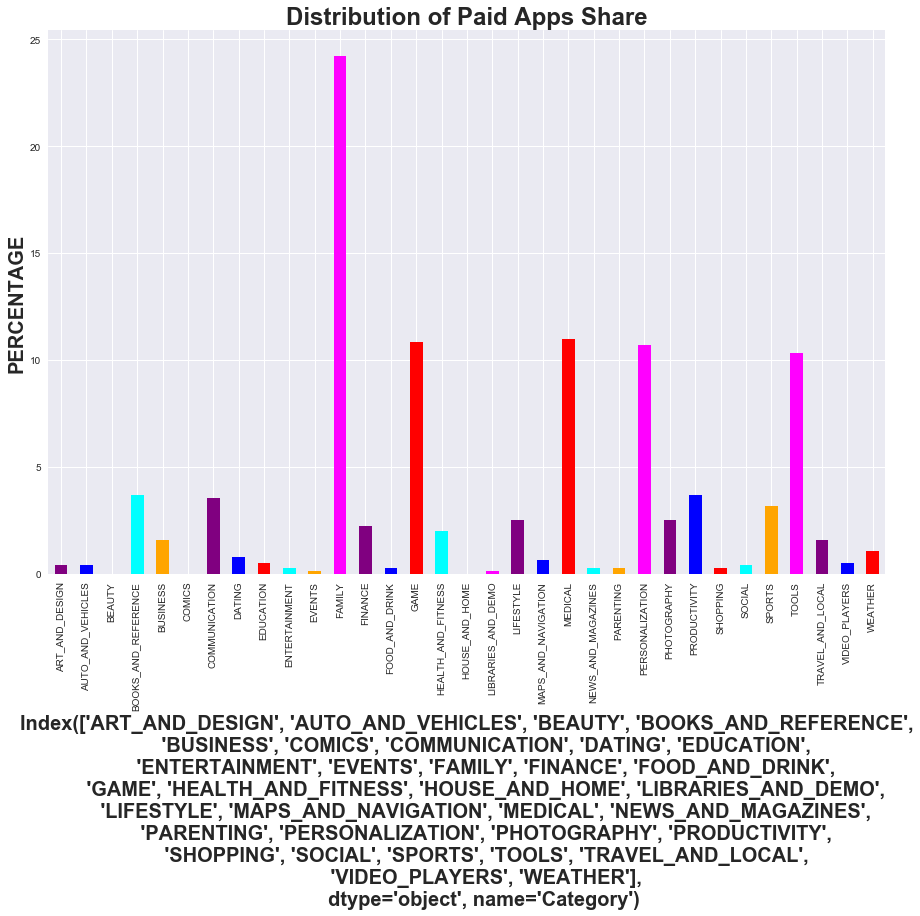

In [96]:
# Analyze only market share distribution of Paid Apps distribution seperately
PAID_ONLY_APP_DF = pd.DataFrame()
PAID_ONLY_APP_DF['Paid'] =  by_Usage['Paid']
PAID_ONLY_APP_DF['Percentage-Paid'] = 100 * by_Usage['Paid']/np.sum(PAID_ONLY_APP_DF['Paid'])


fig,ax = plt.subplots(nrows=1,ncols=1)
ax = PAID_ONLY_APP_DF['Percentage-Paid'].plot(kind='bar', figsize=(15, 10),color=['purple','blue','red','cyan','orange','magenta'])
ax.set_title("Distribution of Paid Apps Share", fontsize='large',fontweight='bold')
ax.set_xlabel(PAID_ONLY_APP_DF.index, fontsize='medium',fontweight='bold')
ax.set_ylabel("PERCENTAGE", fontsize='medium', fontweight='bold')
plt.show()
fig.savefig('PaidAppsDistribution.pdf')


In [97]:
np.sum(PAID_ONLY_APP_DF['Paid'])/32

23.625

In [ ]:
Grpby_Rating = dataset.groupby("Category").mean()["Rating"].to_frame()

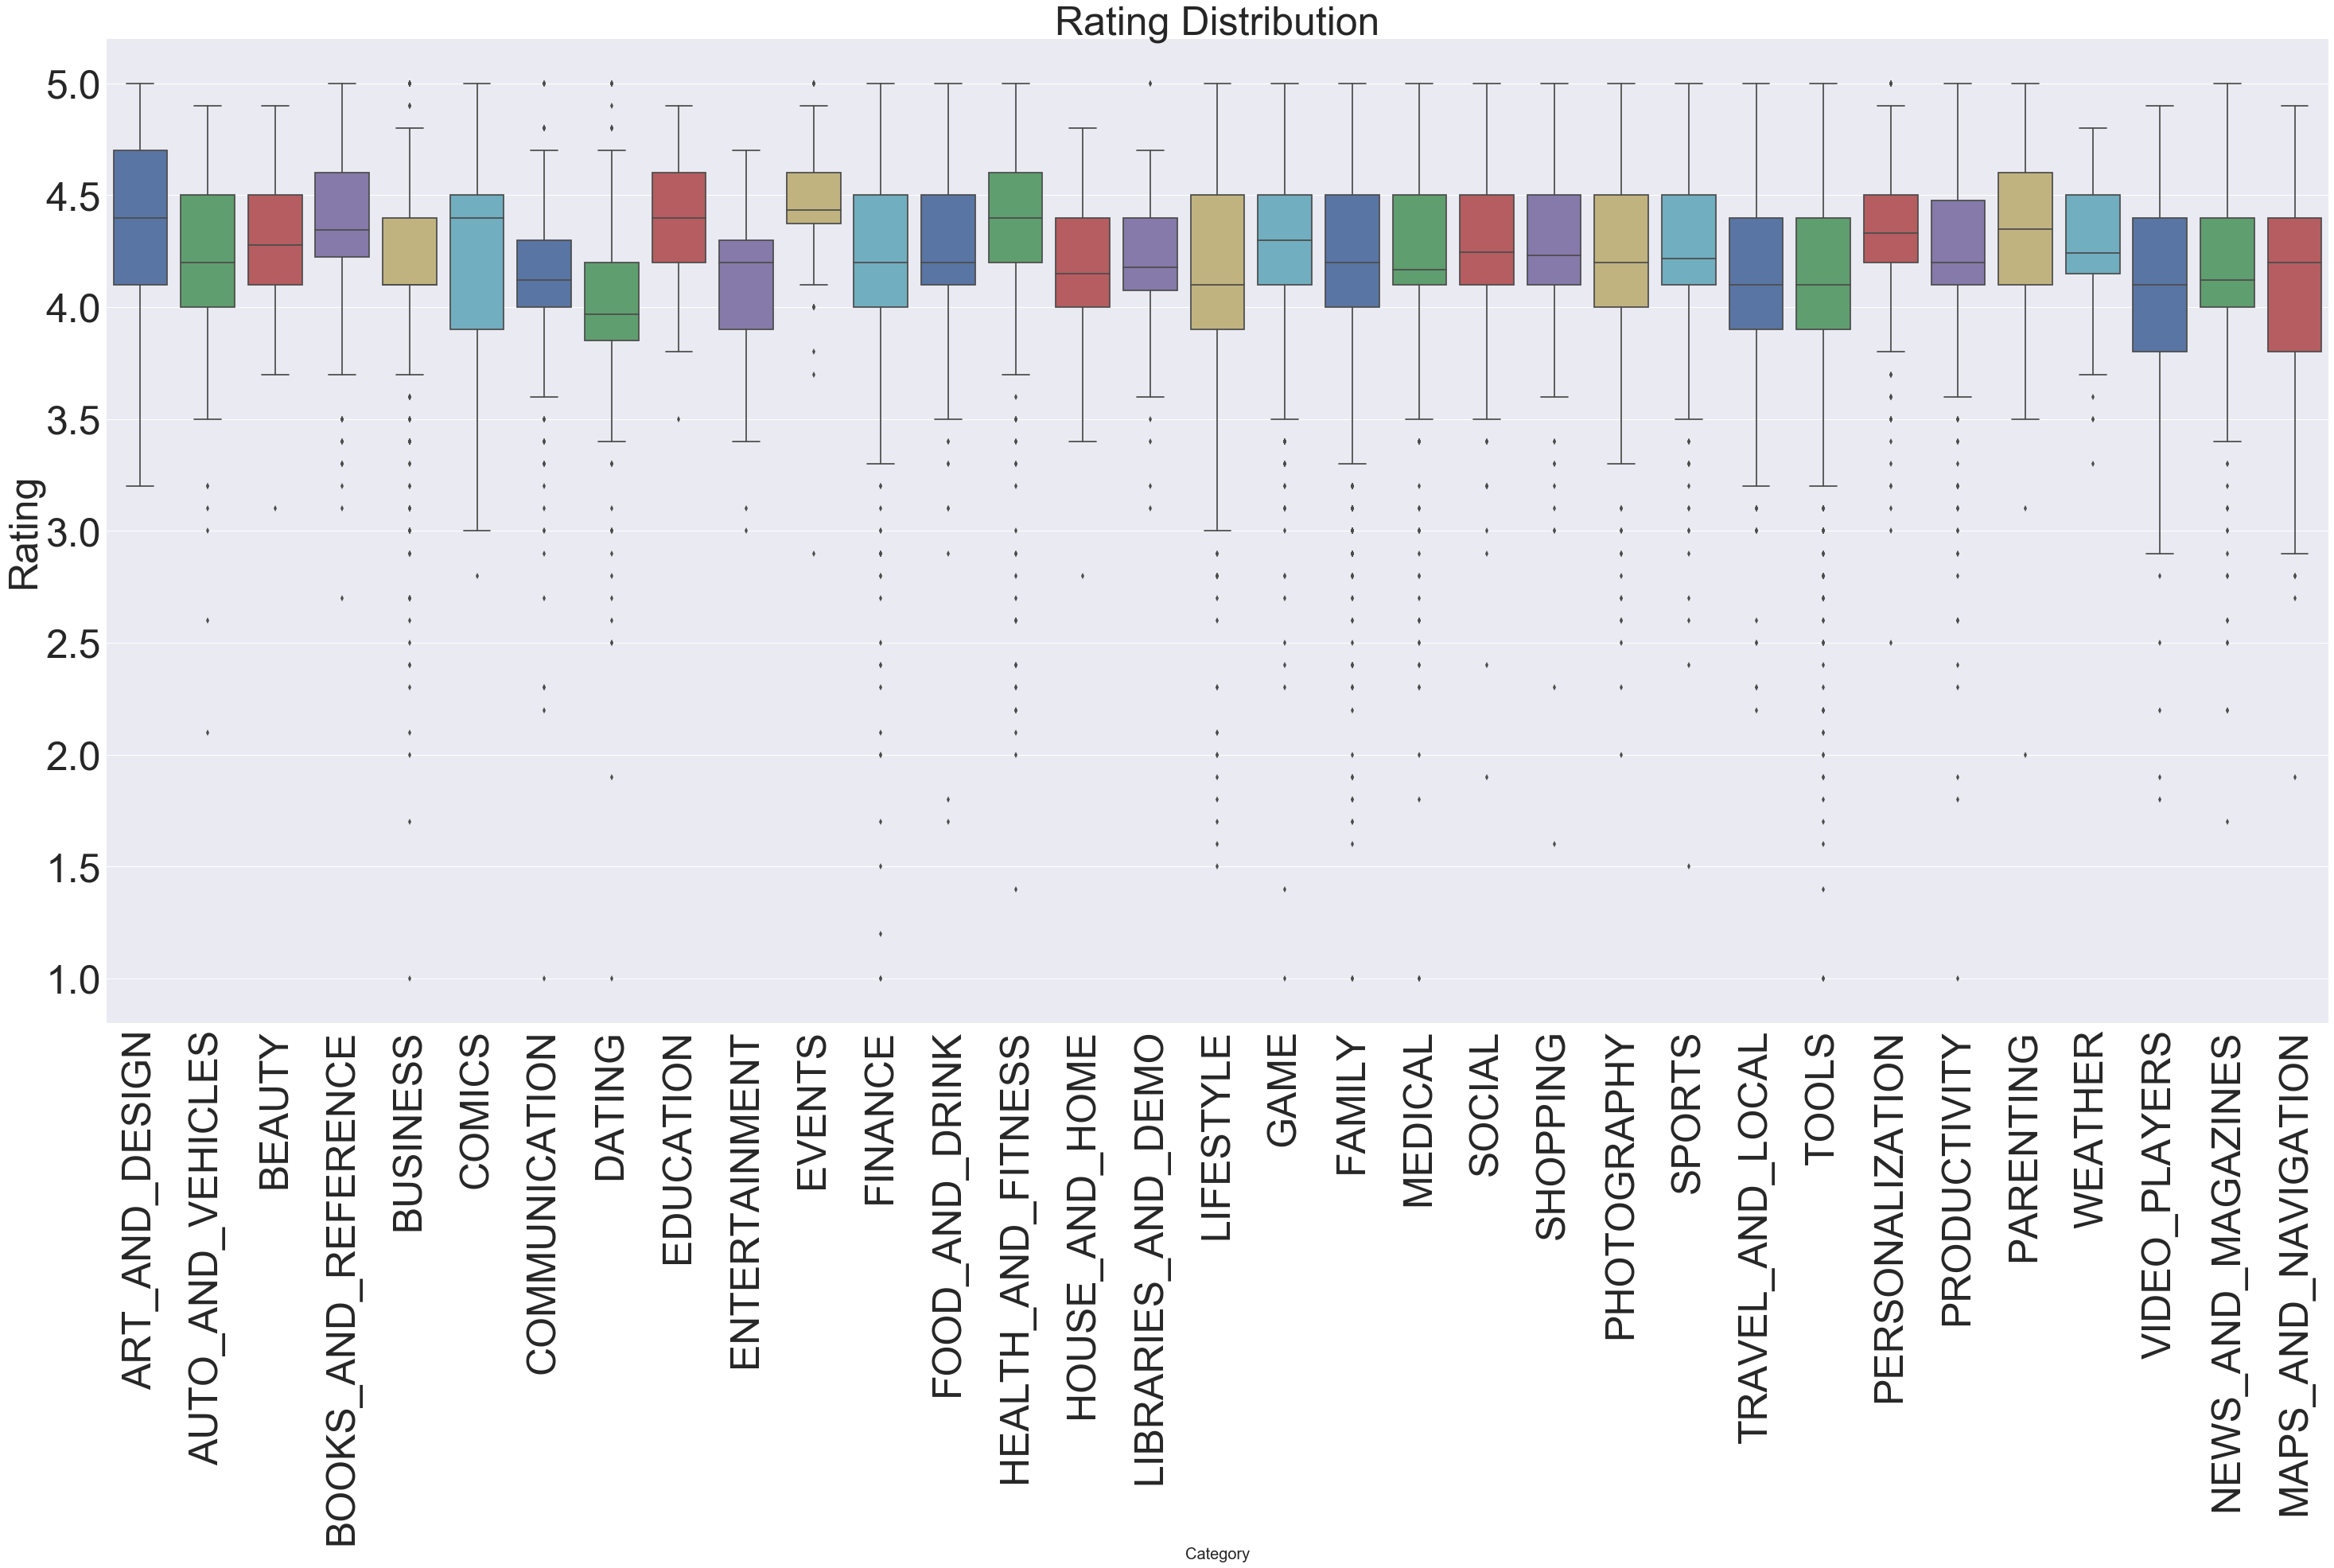

In [98]:
Grpby_Rating = dataset.groupby("Category").describe()["Rating"].to_frame()
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(40,20),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
fig = plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.axes_style("darkgrid")
splot = sns.boxplot(x=dataset["Category"], y=dataset["Rating"],palette="deep")


splot.set_ylabel('Normalized WS')                                                     
plt.tight_layout()                                                                    
splot.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
splot.set_ylabel('Rating',size=50)

splot.axes.set_title("Rating Distribution",fontsize=50)
splot.tick_params(labelsize=50)
sns.plt.show()

fig.savefig('RatingsDistribution.pdf')

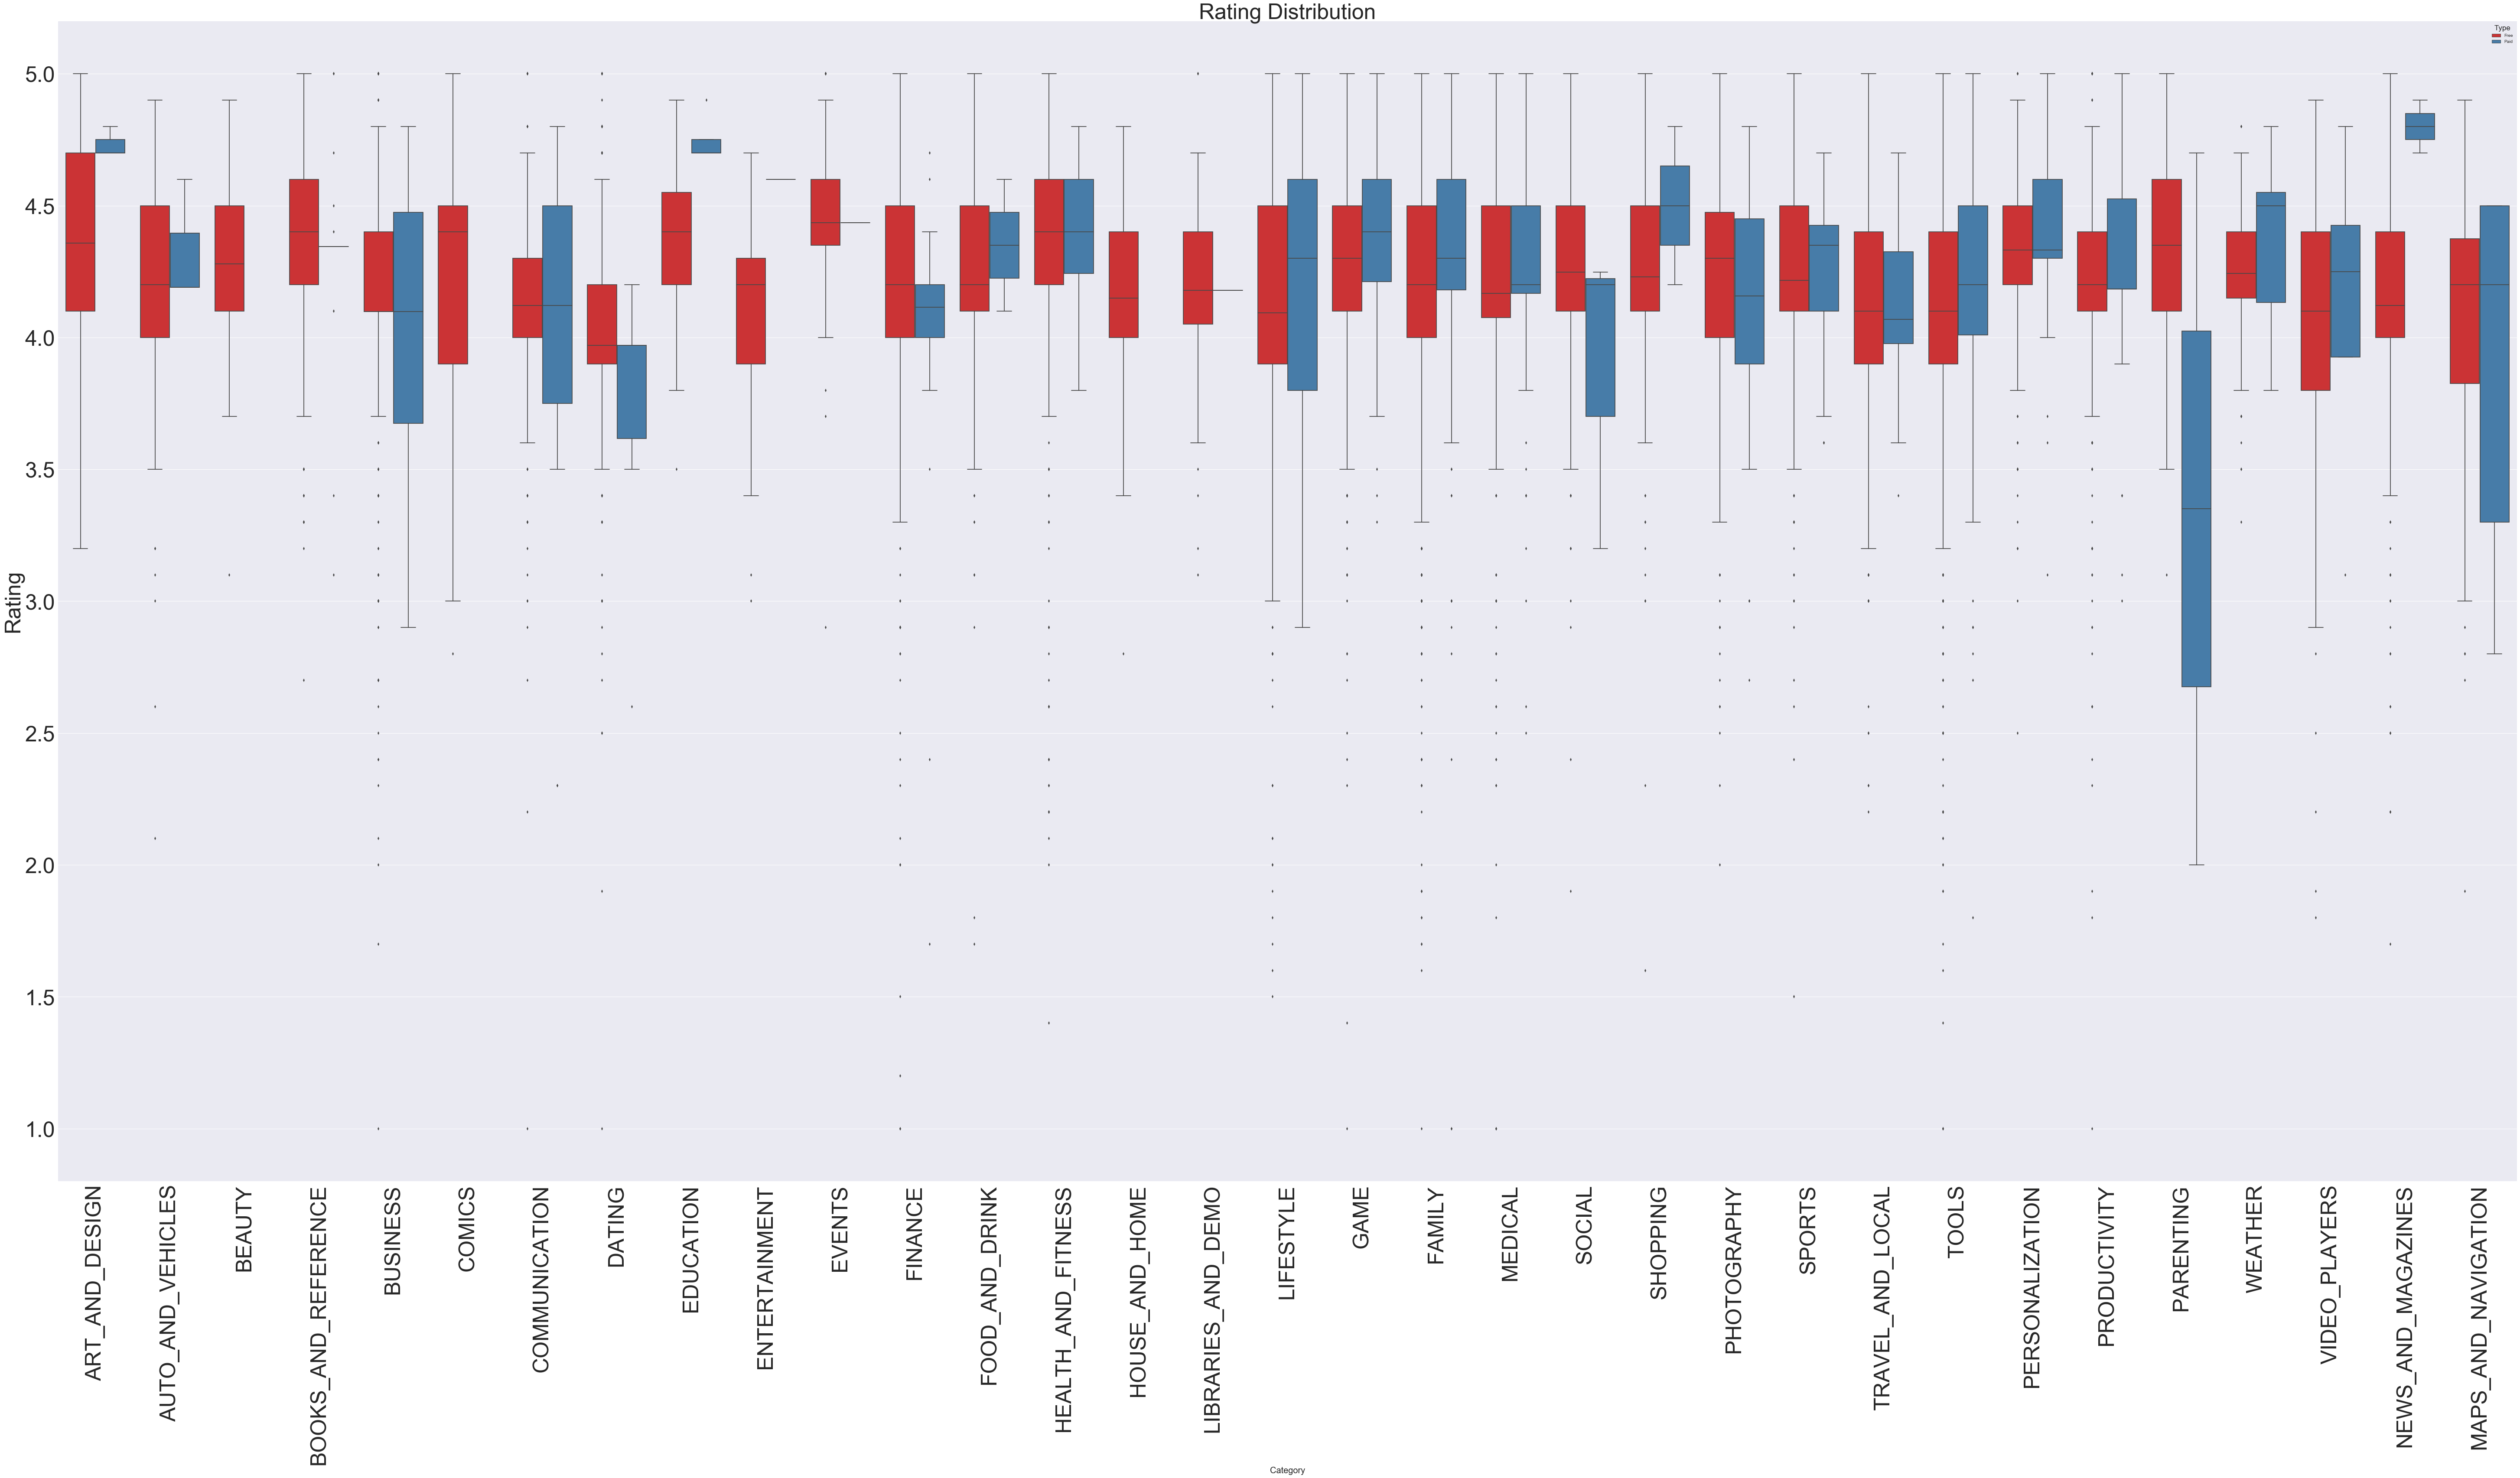

In [100]:
# Analyze Ratings on Categories
Grpby_Rating = dataset.groupby(['Category','Type']).mean()['Rating']

sns.set(rc={'figure.figsize':(80,40),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
fig = plt.figure(figsize=(80,40))
plt.xticks(rotation=90)
sns.axes_style("darkgrid")
splot = sns.boxplot(x=dataset["Category"], y=dataset["Rating"],hue =dataset["Type"],palette="Set1")

splot.set_ylabel('Normalized WS')                                                     
plt.tight_layout()                                                                    
splot.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
splot.set_ylabel('Rating',size=50)

splot.axes.set_title("Rating Distribution",fontsize=50)
splot.tick_params(labelsize=50)
sns.plt.show()

fig.savefig('RatingsDistributionFreeVsPaid.pdf')



In [25]:
dfsubset = dataset[dataset['Type']=="Paid"]

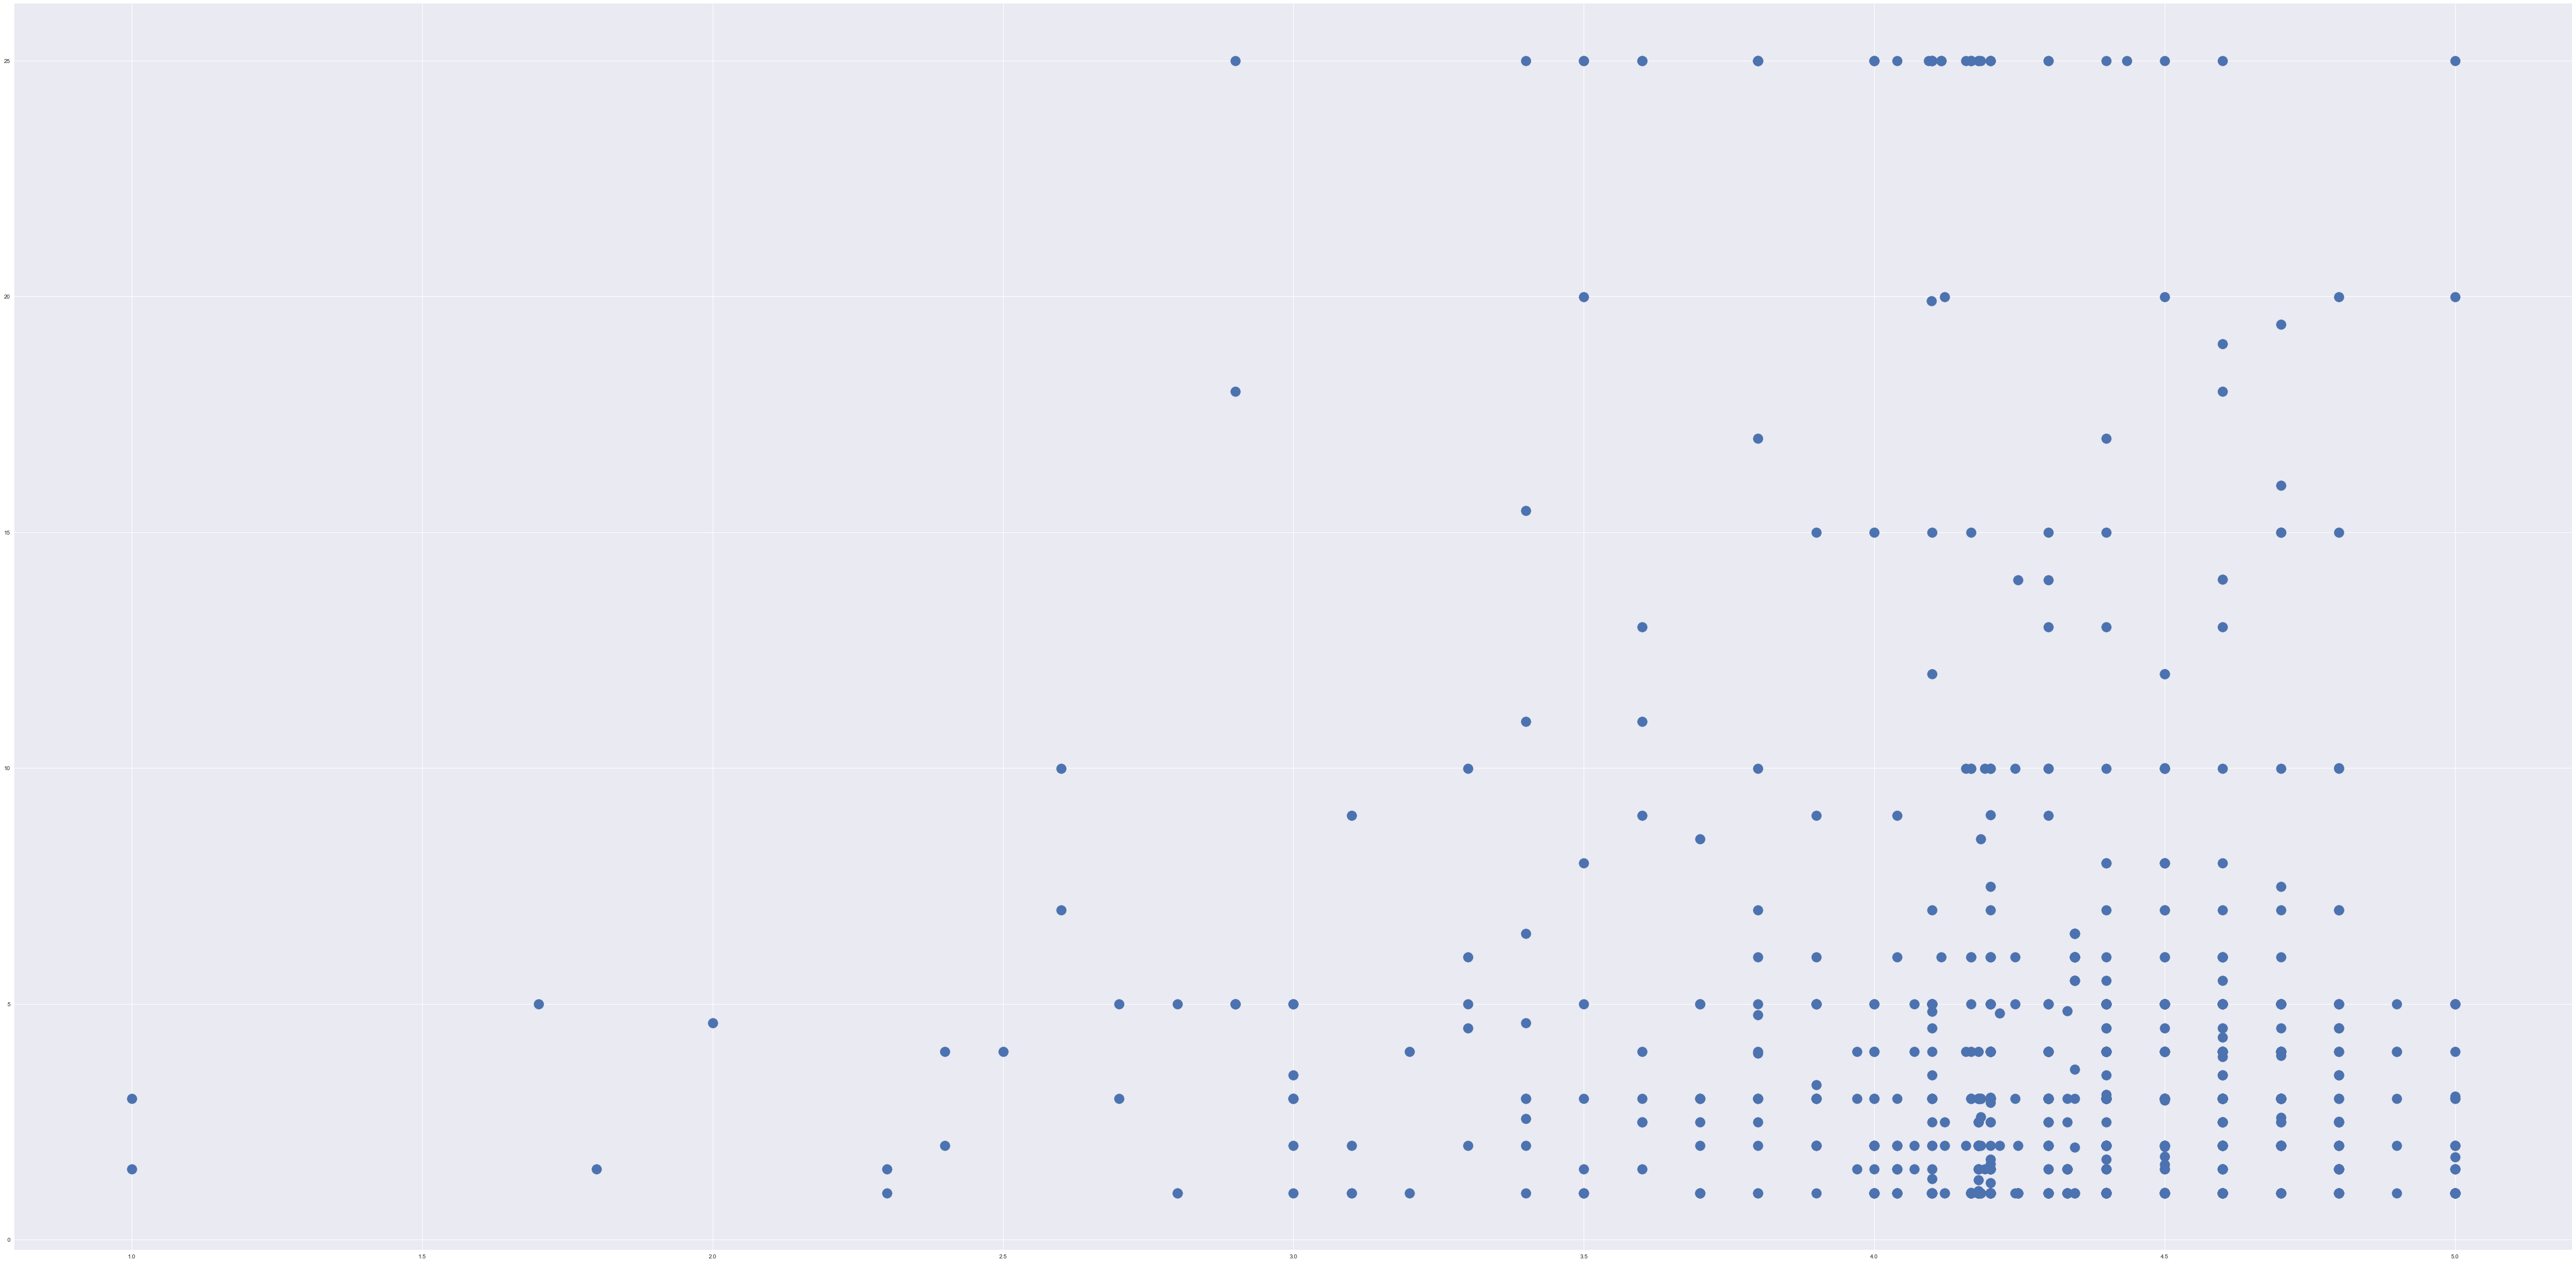

In [38]:
dfsubset['Price'] = dfsubset['Price'].clip(lower = 0.0, upper =25.0)
plt.scatter(dfsubset['Rating'],dfsubset['Price'],s=300)
plt.show()

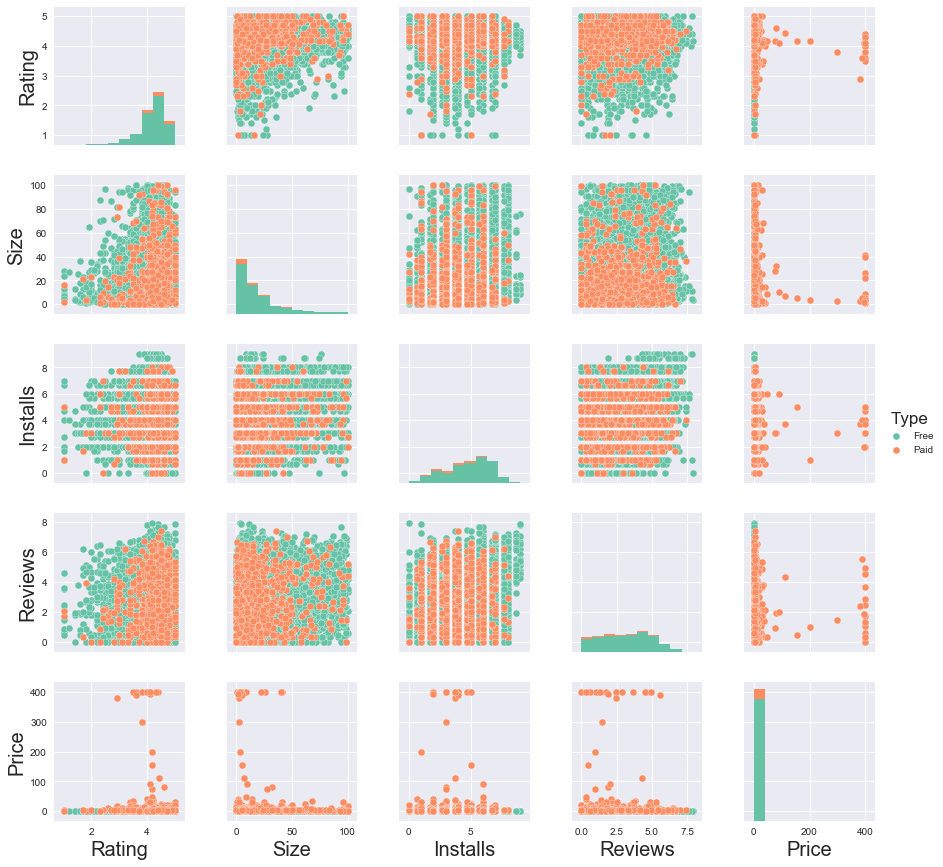

In [86]:
x = dataset['Rating'].dropna()
y = dataset['Size'].dropna()
z = dataset['Installs'][dataset.Installs!=0].dropna()
p = dataset['Reviews'][dataset.Reviews!=0].dropna()
t = dataset['Type'].dropna()
price = dataset['Price'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log10(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),diag_kind="hist", hue='Type', palette="Set2")

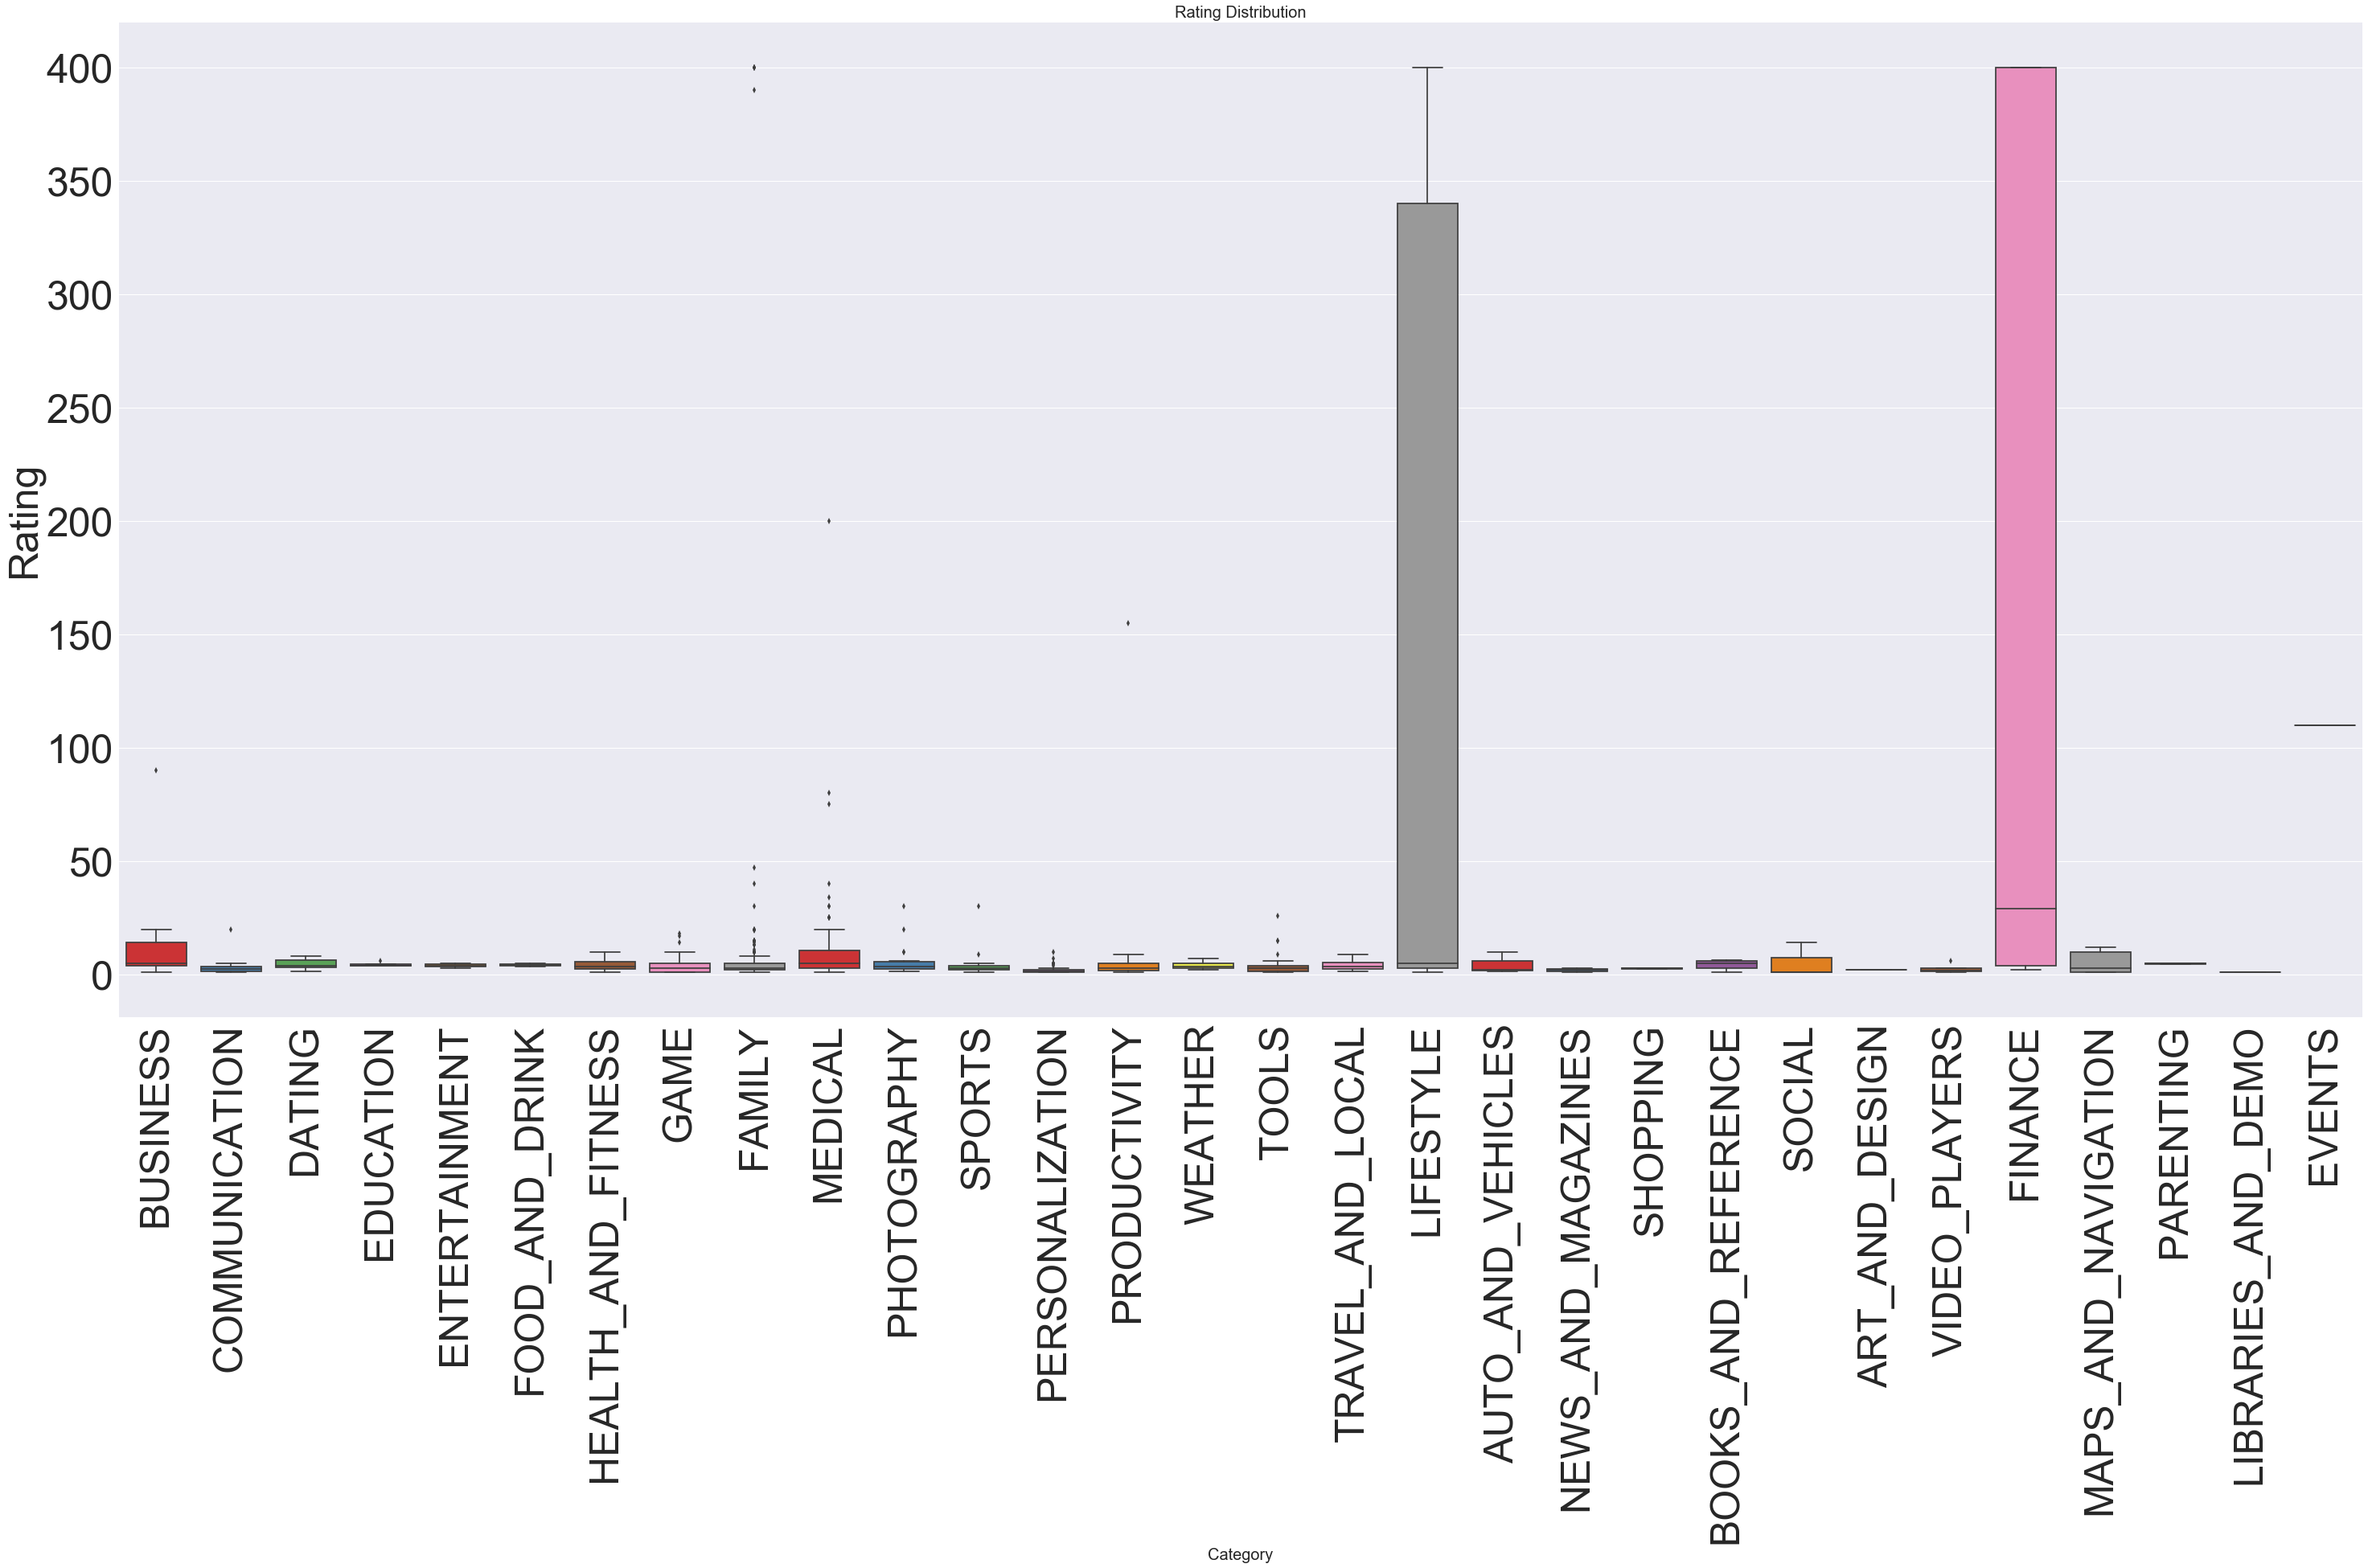

In [53]:
# Plot Price distribution
dfsubset = dataset[dataset['Type']=="Paid"]

sns.set(rc={'figure.figsize':(40,20),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
fig = plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.axes_style("darkgrid")
splot = sns.boxplot(x=dfsubset["Category"], y=dfsubset["Price"],palette="Set1")

splot.set_ylabel('Normalized WS')                                                     
plt.tight_layout()                                                                    
splot.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
splot.set_ylabel('Rating',size=50)

splot.axes.set_title("Rating Distribution",fontsize=20)
splot.tick_params(labelsize=50)
sns.plt.show()


In [57]:
# Outliers in Price Application
dfsubset[dfsubset["Price"] > 50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price
2253,Vargo Anesthesia Mega App,MEDICAL,4.600000,92,32.000,1000,Paid,79.99
2390,Language Therapy: Aphasia,MEDICAL,4.166552,10,28.000,1000,Paid,74.99
4197,most expensive app (H),FAMILY,4.300000,6,1.500,100,Paid,399.99
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26.000,10000,Paid,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.300,10000,Paid,400.00
5351,I am rich,LIFESTYLE,3.800000,3547,1.800,100000,Paid,399.99
5354,I am Rich Plus,FAMILY,4.000000,856,8.700,10000,Paid,399.99
5355,I am rich VIP,LIFESTYLE,3.800000,411,2.600,10000,Paid,299.99
5356,I Am Rich Premium,FINANCE,4.100000,1867,4.700,50000,Paid,399.99
5357,I am extremely Rich,LIFESTYLE,2.900000,41,2.900,1000,Paid,379.99


In [84]:
dataset[dataset["Reviews"] > 1000000].nlargest(20,'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price
2544,Facebook,SOCIAL,4.1,78158306,15.984090,1000000000,Free,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11.307430,1000000000,Free,0.0
2545,Instagram,SOCIAL,4.5,66577313,15.984090,1000000000,Free,0.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11.307430,1000000000,Free,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.000000,100000000,Free,0.0
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,8.782837,500000000,Free,0.0
1654,Subway Surfers,GAME,4.5,27722264,76.000000,1000000000,Free,0.0
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,15.792756,1000000000,Free,0.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,8.782837,500000000,Free,0.0
1660,Clash Royale,GAME,4.6,23133508,97.000000,100000000,Free,0.0


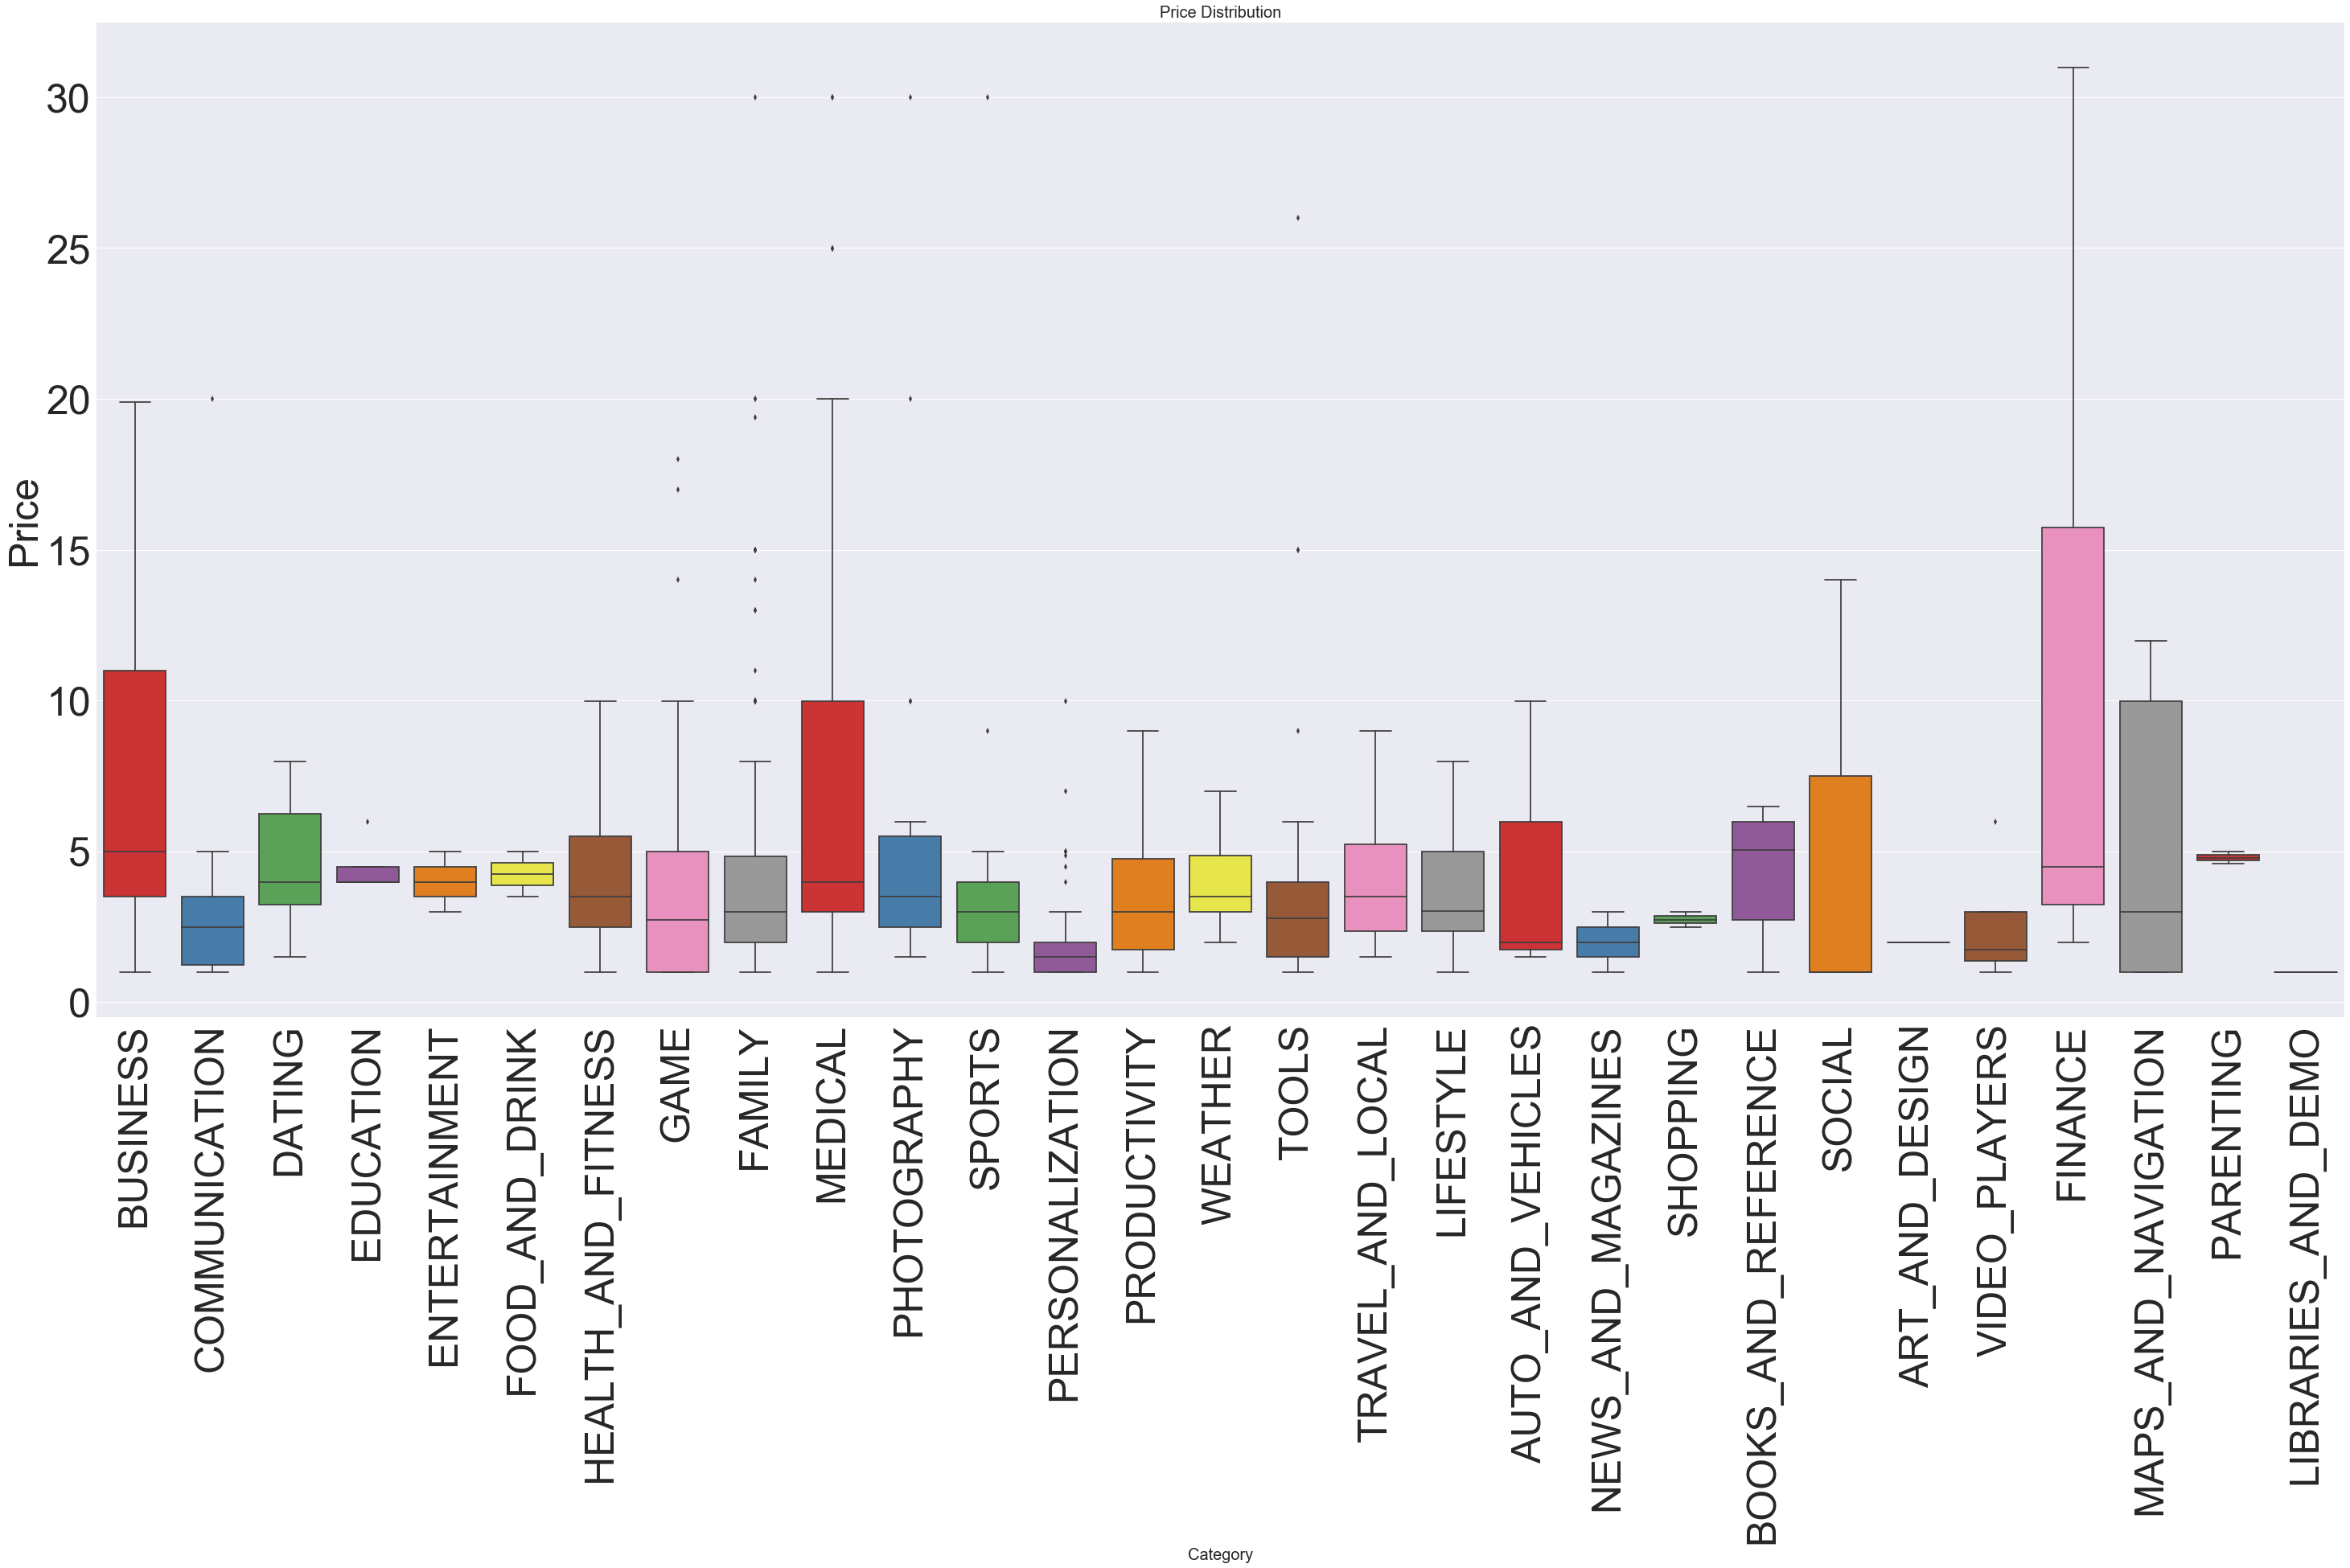

Mean App Price Across all Catregories:
4.181854395604333


In [101]:
# Price After Removing Outliers
dfsubset = dfsubset[dfsubset["Price"] < 32]
sns.set(rc={'figure.figsize':(40,20),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
fig = plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.axes_style("darkgrid")
splot = sns.boxplot(x=dfsubset["Category"], y=dfsubset["Price"],palette="Set1")

splot.set_ylabel('Normalized WS')                                                     
plt.tight_layout()                                                                    
splot.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)                                                   
splot.set_ylabel('Price',size=50)

splot.axes.set_title("Price Distribution",fontsize=20)
splot.tick_params(labelsize=50)
sns.plt.show()
fig.savefig('PriceDistribution.pdf')

print('Mean App Price Across all Catregories:')
print(dfsubset["Price"].mean())

In [102]:
Grpby_Price = dfsubset.groupby("Category").mean()["Price"].to_frame()
Grpby_Price.nlargest(10,'Price')

,Price
Category,
FINANCE,10.590000
BUSINESS,7.754545
MEDICAL,7.265897
PHOTOGRAPHY,6.225263
MAPS_AND_NAVIGATION,5.390000
SOCIAL,5.323333
PARENTING,4.790000
DATING,4.573333
AUTO_AND_VEHICLES,4.490000


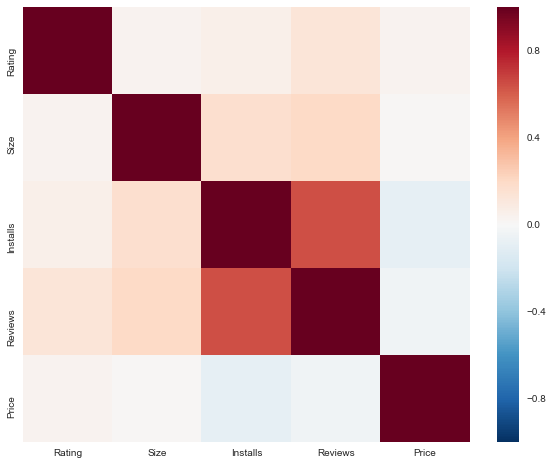

In [80]:
# Clean Dataset and look at correlation between variables
#x = dataset['Rating'].dropna()
#y = dataset['Size'].dropna()
#z = dataset['Installs'][dataset.Installs!=0].dropna()
#p = dataset['Reviews'][dataset.Reviews!=0].dropna()
#t = dataset['Type'].dropna()
#price = dataset[dataset['Price'] < 100]


newvars     = ['Rating','Size','Installs','Reviews','Price']
subsetdf    = pd.DataFrame(dataset,columns=newvars)

subsetdf    = subsetdf[subsetdf["Price"] < 30]
subsetdf    = subsetdf[subsetdf["Reviews"] < 1000000]
subsetdf    = subsetdf[subsetdf["Installs"] < 10000000]


# Plot Correlation Matrix heatmap to Visualize correlations
f, ax = plt.subplots(figsize=(10, 8))
corr = subsetdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)




In [85]:
# Identify Highly Correalted variables (Remove Correlated variables)
def get_redundant_pairs(df):
#    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(subsetdf, 5))

Top Absolute Correlations
Installs  Reviews     0.641682
Size      Reviews     0.198000
          Installs    0.170746
Rating    Reviews     0.129666
Installs  Price       0.086834
dtype: float64


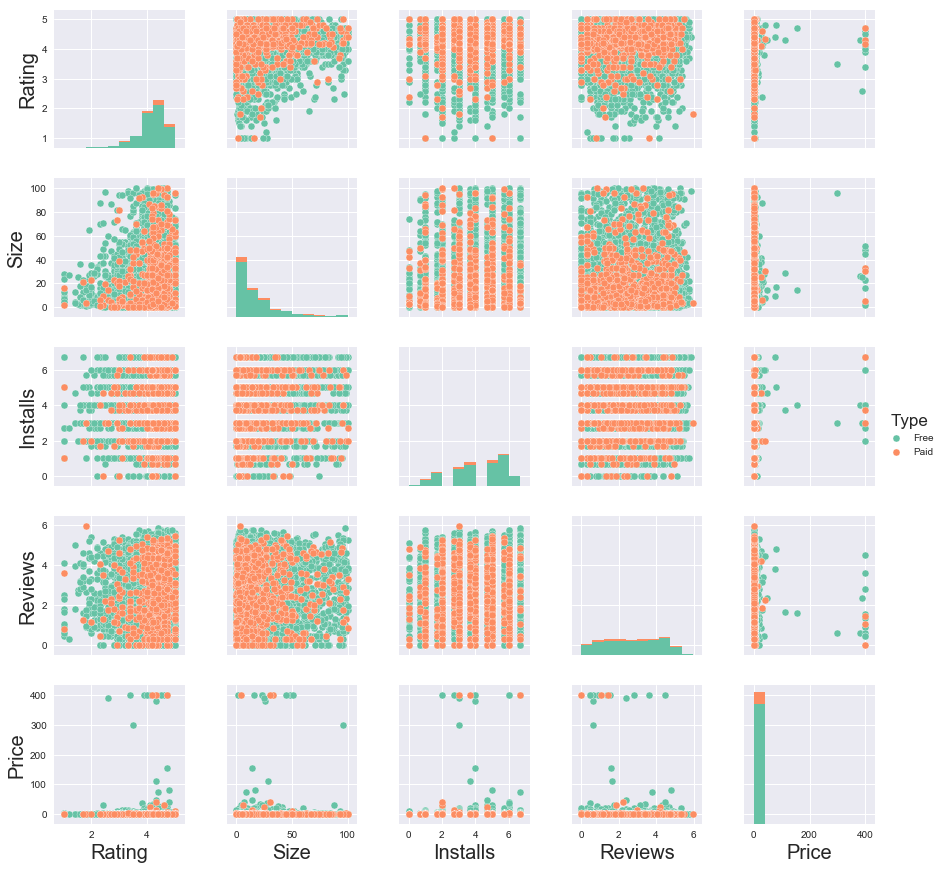

In [88]:
newvars     = ['Rating','Size','Installs','Reviews','Price','Type']
subsetdf    = pd.DataFrame(dataset,columns=newvars)

subsetdf    = subsetdf[subsetdf["Price"] < 30]
subsetdf    = subsetdf[subsetdf["Reviews"] < 1000000]
subsetdf    = subsetdf[subsetdf["Installs"] < 10000000]

x = subsetdf['Rating'].dropna()
y = subsetdf['Size'].dropna()
z = subsetdf['Installs'][dataset.Installs!=0].dropna()
p = subsetdf['Reviews'][dataset.Reviews!=0].dropna()
t = subsetdf['Type'].dropna()
price = dataset['Price'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log10(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),diag_kind="hist", hue='Type', palette="Set2")